['Negative bubbles', 'Positive bubbles', 'Precritical bubbles', 'Worms and loops', 'Stable solitons', 'The U-Skate World', 'Worms', 'Worms join into maze', 'Negatons', 'Turing patterns', 'Chaos to Turing negatons', 'Fingerprints', 'Chaos with negatons', 'Spots and worms', 'Self-replicating spots', 'Super-resonant mazes', 'Mazes', 'Mazes with some chaos', 'Chaos', 'Pulsating solitons', 'Warring microbes', 'Spots and loops', 'Moving spots', 'Waves']


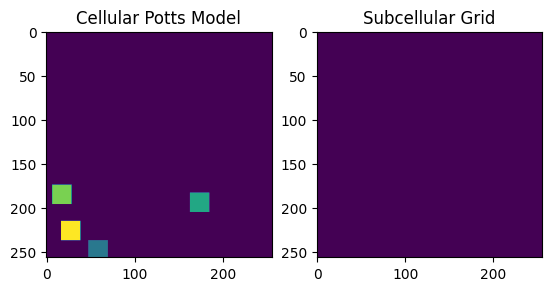

In [ ]:
import torch
from multiomicscellsim.torch_cpm.config import TorchCPMConfig
from multiomicscellsim.torch_cpm.simulation import TorchCPM
import matplotlib.pyplot as plt
from multiomicscellsim.patterns.reaction_diffusion import RDPatternLibrary

print(RDPatternLibrary.get_pattern_names())

size = 256
volume_perc = lambda x: int(size*size*x)
cpm_config = TorchCPMConfig(
    size=size,
    preferred_volumes=torch.tensor([0, .4, .2, .2, .2]),
    preferred_perimeters=torch.tensor([3, 5, 3, 3, 2]),
    adhesion_matrix=torch.tensor([[0, 10, 10, 10, 10],
                                    [10, 0, 2, 3, 4],
                                    [10, 2, 0, 5, 6],
                                    [10, 3, 5, 0, 7],
                                    [10, 4, 6, 7, 0]]),
    frontier_prob=0.5,
    temperature=1,
    run_rd_every = 100,
    cell_types_patterns = [RDPatternLibrary.get_pattern_by_name("The U-Skate World"), 
                           RDPatternLibrary.get_pattern_by_name("Worms and loops"), 
                           RDPatternLibrary.get_pattern_by_name("Negatons"), 
                           RDPatternLibrary.get_pattern_by_name("Fingerprints"), 
                           RDPatternLibrary.get_pattern_by_name("Self-replicating spots")]
)

cpm = TorchCPM(cpm_config)

# Pick random x/y locations and draw a cell
for cell_type in range(1, 5):
    x = torch.randint(0, size, (1,))
    y = torch.randint(0, size, (1,))
    cpm.draw_cell(x, y, cell_type=cell_type)
cpm.plot_grid()

# TODO: BASE EVERYTHING ON CELL TYPES AGAIN AND NOT ON CELL_ID
# FIXME: Something's going on with the pasting of the subcellular structures (see output)

100%|██████████| 10000/10000 [00:00<00:00, 27708.97it/s]


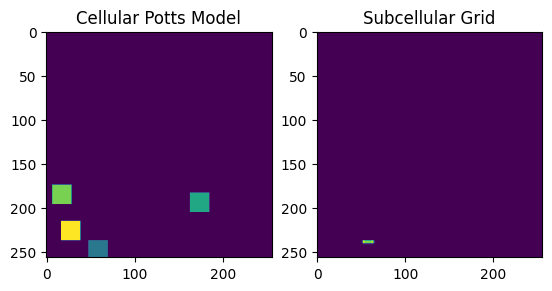

100%|██████████| 10000/10000 [00:00<00:00, 24545.35it/s]


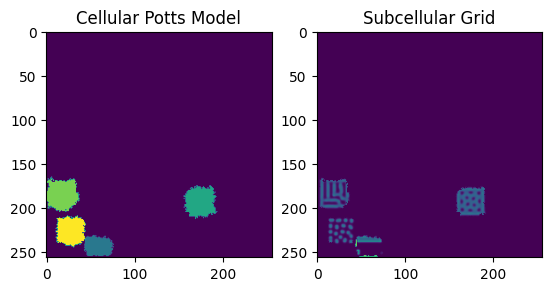

100%|██████████| 10000/10000 [00:00<00:00, 22655.85it/s]


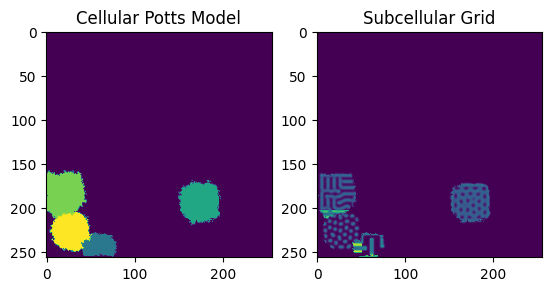

100%|██████████| 10000/10000 [00:00<00:00, 19458.89it/s]


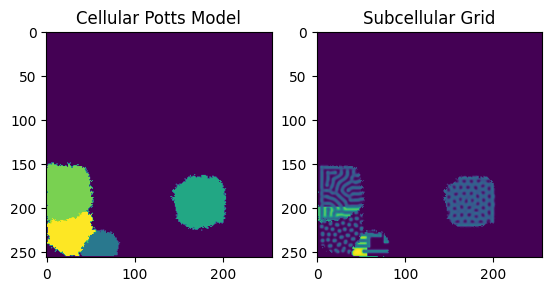

100%|██████████| 10000/10000 [00:00<00:00, 20230.72it/s]


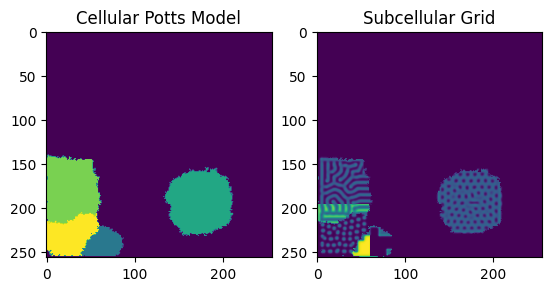

100%|██████████| 500/500 [00:33<00:00, 14.97it/s]


In [5]:
simulation = cpm.yield_step(500)
for s, step in enumerate(simulation):
    if s % 100 == 0:
        cpm.plot_grid()

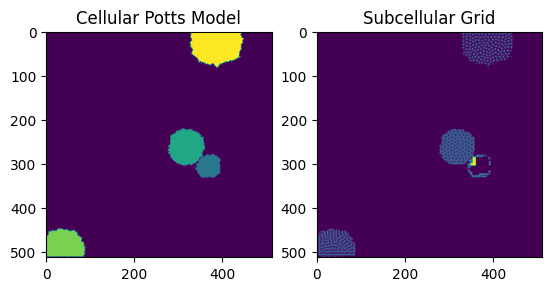

In [3]:
cpm.plot_grid()

In [ ]:

rd = ReactionDiffusion(config=reaction_diffusion_config)
new_cell = rd.run_until_convergence()
plt.imshow(new_cell[1])

In [ ]:
new_state = torch.where(step == 1, new_cell[1], step)
plt.imshow(new_state, cmap='inferno')

In [ ]:
import torch




cropped_mask, indices = smallest_square_crop_with_indices(mask)
print("Cropped Mask:\n", cropped_mask)
print("Indices:", indices)

# Paste back into original mask
output_mask = torch.zeros_like(mask)
start_row, end_row, start_col, end_col = indices
output_mask[start_row:end_row, start_col:end_col] = cropped_mask
print("Reconstructed Mask:\n", output_mask)

plt.imshow(crop)